In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!unzip gdrive/MyDrive/CrisisMMD_v2.0.zip

Görüntülenen çıkış son 5000 satıra kısaltıldı.
  inflating: CrisisMMD_v2.0/data_image/hurricane_maria/25_9_2017/912401270580957185_0.jpg  
  inflating: CrisisMMD_v2.0/data_image/hurricane_maria/25_9_2017/912402917000454144_0.jpg  
  inflating: CrisisMMD_v2.0/data_image/hurricane_maria/25_9_2017/912406453947858944_0.jpg  
  inflating: CrisisMMD_v2.0/data_image/hurricane_maria/25_9_2017/912407182599245824_0.jpg  
  inflating: CrisisMMD_v2.0/data_image/hurricane_maria/25_9_2017/912407182599245824_1.jpg  
  inflating: CrisisMMD_v2.0/data_image/hurricane_maria/25_9_2017/912408142654394370_0.jpg  
  inflating: CrisisMMD_v2.0/data_image/hurricane_maria/25_9_2017/912409535918288896_0.jpg  
  inflating: CrisisMMD_v2.0/data_image/hurricane_maria/25_9_2017/912411531970793472_0.jpg  
  inflating: CrisisMMD_v2.0/data_image/hurricane_maria/25_9_2017/912414927171842048_0.jpg  
  inflating: CrisisMMD_v2.0/data_image/hurricane_maria/25_9_2017/912414989197099008_0.jpg  
  inflating: CrisisMMD_v2.0/data_

In [6]:
import os 
import cv2
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from data import *
from basic_dnn_model import *

tsv_data_hurricane_harvey = pd.read_csv('/content/CrisisMMD_v2.0/annotations/hurricane_harvey_final_data.tsv', sep='\t')
tsv_data_hurricane_harvey = tsv_data_hurricane_harvey.sample(frac=1).reset_index(drop=True)

tsv_data_hurricane_maria = pd.read_csv('/content/CrisisMMD_v2.0/annotations/hurricane_maria_final_data.tsv', sep='\t')
tsv_data_hurricane_maria = tsv_data_hurricane_maria.sample(frac=1).reset_index(drop=True)

tsv_data_hurricane_irma = pd.read_csv('/content/CrisisMMD_v2.0/annotations/hurricane_irma_final_data.tsv', sep='\t')
tsv_data_hurricane_irma = tsv_data_hurricane_irma.sample(frac=1).reset_index(drop=True)

tsv_data_california_wildfires = pd.read_csv('/content/CrisisMMD_v2.0/annotations/california_wildfires_final_data.tsv', sep='\t')
tsv_data_california_wildfires = tsv_data_california_wildfires.sample(frac=1).reset_index(drop=True)

tsv_data_iraq_iran_earthquake = pd.read_csv('/content/CrisisMMD_v2.0/annotations/iraq_iran_earthquake_final_data.tsv', sep='\t')
tsv_data_iraq_iran_earthquake = tsv_data_iraq_iran_earthquake.sample(frac=1).reset_index(drop=True)

tsv_data_mexico_earthquake = pd.read_csv('/content/CrisisMMD_v2.0/annotations/mexico_earthquake_final_data.tsv', sep='\t')
tsv_data_mexico_earthquake = tsv_data_mexico_earthquake.sample(frac=1).reset_index(drop=True)

tsv_data_srilanka_floods = pd.read_csv('/content/CrisisMMD_v2.0/annotations/srilanka_floods_final_data.tsv', sep='\t')
tsv_data_srilanka_floods = tsv_data_srilanka_floods.sample(frac=1).reset_index(drop=True)

In [7]:
options = ['little_or_no_damage','mild_damage','severe_damage'] 
damage_rated_images=tsv_data_hurricane_harvey[tsv_data_hurricane_harvey['image_damage'].isin(options)]
print("Number of images with known damage level tsv_data_hurricane_harvey: "+str(damage_rated_images.shape[0]))
print("Number of informative images with known damage level tsv_data_hurricane_harvey: "+str(damage_rated_images[damage_rated_images['image_info']=='informative'].shape[0]))

damage_rated_images=tsv_data_hurricane_maria[tsv_data_hurricane_maria['image_damage'].isin(options)]
print("\nNumber of images with known damage level tsv_data_hurricane_maria: "+str(damage_rated_images.shape[0]))
print("Number of informative images with known damage level tsv_data_hurricane_maria: "+str(damage_rated_images[damage_rated_images['image_info']=='informative'].shape[0]))

damage_rated_images=tsv_data_hurricane_irma[tsv_data_hurricane_irma['image_damage'].isin(options)]
print("\nNumber of images with known damage level tsv_data_hurricane_irma: "+str(damage_rated_images.shape[0]))
print("Number of informative images with known damage level tsv_data_hurricane_irma: "+str(damage_rated_images[damage_rated_images['image_info']=='informative'].shape[0]))

damage_rated_images=tsv_data_california_wildfires[tsv_data_california_wildfires['image_damage'].isin(options)]
print("\nNumber of images with known damage level tsv_data_california_wildfires: "+str(damage_rated_images.shape[0]))
print("Number of informative images with known damage level tsv_data_california_wildfires: "+str(damage_rated_images[damage_rated_images['image_info']=='informative'].shape[0]))

damage_rated_images=tsv_data_iraq_iran_earthquake[tsv_data_iraq_iran_earthquake['image_damage'].isin(options)]
print("\nNumber of images with known damage level tsv_data_iraq_iran_earthquake: "+str(damage_rated_images.shape[0]))
print("Number of informative images with known damage level tsv_data_iraq_iran_earthquake: "+str(damage_rated_images[damage_rated_images['image_info']=='informative'].shape[0]))

damage_rated_images=tsv_data_mexico_earthquake[tsv_data_mexico_earthquake['image_damage'].isin(options)]
print("\nNumber of images with known damage level tsv_data_mexico_earthquake: "+str(damage_rated_images.shape[0]))
print("Number of informative images with known damage level tsv_data_mexico_earthquake: "+str(damage_rated_images[damage_rated_images['image_info']=='informative'].shape[0]))

damage_rated_images=tsv_data_srilanka_floods[tsv_data_srilanka_floods['image_damage'].isin(options)]
print("\nNumber of images with known damage level tsv_data_srilanka_floods: "+str(damage_rated_images.shape[0]))
print("Number of informative images with known damage level tsv_data_srilanka_floods: "+str(damage_rated_images[damage_rated_images['image_info']=='informative'].shape[0]))

Number of images with known damage level tsv_data_hurricane_harvey: 894
Number of informative images with known damage level tsv_data_hurricane_harvey: 894

Number of images with known damage level tsv_data_hurricane_maria: 862
Number of informative images with known damage level tsv_data_hurricane_maria: 862

Number of images with known damage level tsv_data_hurricane_irma: 800
Number of informative images with known damage level tsv_data_hurricane_irma: 800

Number of images with known damage level tsv_data_california_wildfires: 531
Number of informative images with known damage level tsv_data_california_wildfires: 531

Number of images with known damage level tsv_data_iraq_iran_earthquake: 173
Number of informative images with known damage level tsv_data_iraq_iran_earthquake: 173

Number of images with known damage level tsv_data_mexico_earthquake: 178
Number of informative images with known damage level tsv_data_mexico_earthquake: 178

Number of images with known damage level tsv_d

In [8]:
disaster_df_cols=['image_id','image_info', 'image_info_conf','image_human','image_human_conf', 'image_damage', 'image_damage_conf','image_url', 'image_path']

In [9]:
hurricane_harvey_df=pd.DataFrame(tsv_data_hurricane_harvey[disaster_df_cols],columns=disaster_df_cols)

hurricane_maria_df=pd.DataFrame(tsv_data_hurricane_maria[disaster_df_cols],columns=disaster_df_cols)

hurricane_irma_df=pd.DataFrame(tsv_data_hurricane_irma[disaster_df_cols],columns=disaster_df_cols)

california_wildfires_df=pd.DataFrame(tsv_data_california_wildfires[disaster_df_cols],columns=disaster_df_cols)

iraq_iran_earthquake_df=pd.DataFrame(tsv_data_iraq_iran_earthquake[disaster_df_cols],columns=disaster_df_cols)

mexico_earthquake_df=pd.DataFrame(tsv_data_mexico_earthquake[disaster_df_cols],columns=disaster_df_cols)

srilanka_floods_df=pd.DataFrame(tsv_data_srilanka_floods[disaster_df_cols],columns=disaster_df_cols)

frames = [hurricane_harvey_df, hurricane_maria_df, hurricane_irma_df, california_wildfires_df, iraq_iran_earthquake_df, mexico_earthquake_df, srilanka_floods_df]
disaster_df = pd.concat(frames)

hurricane_frames = [hurricane_harvey_df, hurricane_maria_df, hurricane_irma_df]
hurricane_df = pd.concat(hurricane_frames)

wildfire_df = california_wildfires_df

earthquake_frames = [iraq_iran_earthquake_df, mexico_earthquake_df]
earthquake_df = pd.concat(earthquake_frames)

floods_df = srilanka_floods_df

disaster_df

image_id       image_info  image_info_conf  \
0     906728836208852992_0      informative           1.0000   
1     908011134401179648_0  not_informative           0.6622   
2     905277902266273792_0      informative           0.7734   
3     905095591675518976_0      informative           0.7466   
4     906187362941767685_0      informative           0.3448   
...                    ...              ...              ...   
1020  873306605122703360_1      informative           1.0000   
1021  870035816990425089_0      informative           0.3636   
1022  876321064950927360_0  not_informative           1.0000   
1023  877817946185314304_0  not_informative           1.0000   
1024  878019187658063872_0  not_informative           1.0000   

                                 image_human  image_human_conf   image_damage  \
0                 other_relevant_information            1.0000            NaN   
1                                        NaN               NaN            NaN   
2                 other_relevant_information            0.7734            NaN   
3          infrastructure_and_utility_damage            0.7466  severe_damage   
4     rescue_volunteering_or_donation_effort            0.3448            NaN   
...                                      ...               ...            ...   
1020                    affected_individuals            1.0000            NaN   
1021                          vehicle_damage            0.3636            NaN   
1022                                     NaN               NaN            NaN   
1023                                     NaN               NaN            NaN   
1024                                     NaN               NaN            NaN   

      image_damage_conf                                       image_url  \
0                   NaN  http://pbs.twimg.com/media/DJVYBWyW4AEEADk.jpg   
1                   NaN  http://pbs.twimg.com/media/DJmmimrU8AAUxiq.jpg   
2                   NaN  http://pbs.twimg.com/media/DJAxc7iUQAA5xzY.jpg   
3                   1.0  http://pbs.twimg.com/media/DI-K87OW0AA_JC5.jpg   
4                   NaN  http://pbs.twimg.com/media/DJNsmq1W4AASQSg.jpg   
...                 ...                                             ...   
1020                NaN  http://pbs.twimg.com/media/DB6bgqYXcAIfdNc.jpg   
1021                NaN  http://pbs.twimg.com/media/DBL87kXUIAAQVwu.jpg   
1022                NaN  http://pbs.twimg.com/media/DClRXQ1VoAEJKNs.jpg   
1023                NaN  http://pbs.twimg.com/media/DC6iw0oXoAAikya.jpg   
1024                NaN  http://pbs.twimg.com/media/DC9ZLtMW0AEsGz7.jpg   

                                             image_path  
0     data_image/hurricane_harvey/10_9_2017/90672883...  
1     data_image/hurricane_harvey/13_9_2017/90801113...  
2     data_image/hurricane_harvey/6_9_2017/905277902...  
3     data_image/hurricane_harvey/5_9_2017/905095591...  
4     data_image/hurricane_harvey/8_9_2017/906187362...  
...                                                 ...  
1020  data_image/srilanka_floods/9_6_2017/8733066051...  
1021  data_image/srilanka_floods/31_5_2017/870035816...  
1022  data_image/srilanka_floods/18_6_2017/876321064...  
1023  data_image/srilanka_floods/22_6_2017/877817946...  
1024  data_image/srilanka_floods/22_6_2017/878019187...  

[18126 rows x 9 columns]

In [10]:
disaster_types = ['infrastructure_and_utility_damage','vehicle_damage']

is_disaster_list=[]

is_disaster_list1=[]
is_disaster_list2=[]
is_disaster_list3=[]
is_disaster_list4=[]

for item in disaster_df['image_human']:
    is_disaster_list.append(1) if item in disaster_types  else is_disaster_list.append(0)
    
disaster_df.insert(0, "is_disaster", is_disaster_list, False)

for item in hurricane_df['image_human']:
    is_disaster_list1.append(1) if item in disaster_types  else is_disaster_list1.append(0)
hurricane_df.insert(0, "is_disaster", is_disaster_list1, False)

for item in wildfire_df['image_human']:
    is_disaster_list2.append(1) if item in disaster_types  else is_disaster_list2.append(0)
wildfire_df.insert(0, "is_disaster", is_disaster_list2, False)

for item in earthquake_df['image_human']:
    is_disaster_list3.append(1) if item in disaster_types  else is_disaster_list3.append(0)
earthquake_df.insert(0, "is_disaster", is_disaster_list3, False)

for item in floods_df['image_human']:
    is_disaster_list4.append(1) if item in disaster_types  else is_disaster_list4.append(0)
floods_df.insert(0, "is_disaster", is_disaster_list4, False)

display(disaster_df)

is_disaster              image_id       image_info  image_info_conf  \
0               0  906728836208852992_0      informative           1.0000   
1               0  908011134401179648_0  not_informative           0.6622   
2               0  905277902266273792_0      informative           0.7734   
3               1  905095591675518976_0      informative           0.7466   
4               0  906187362941767685_0      informative           0.3448   
...           ...                   ...              ...              ...   
1020            0  873306605122703360_1      informative           1.0000   
1021            1  870035816990425089_0      informative           0.3636   
1022            0  876321064950927360_0  not_informative           1.0000   
1023            0  877817946185314304_0  not_informative           1.0000   
1024            0  878019187658063872_0  not_informative           1.0000   

                                 image_human  image_human_conf   image_damage  \
0                 other_relevant_information            1.0000            NaN   
1                                        NaN               NaN            NaN   
2                 other_relevant_information            0.7734            NaN   
3          infrastructure_and_utility_damage            0.7466  severe_damage   
4     rescue_volunteering_or_donation_effort            0.3448            NaN   
...                                      ...               ...            ...   
1020                    affected_individuals            1.0000            NaN   
1021                          vehicle_damage            0.3636            NaN   
1022                                     NaN               NaN            NaN   
1023                                     NaN               NaN            NaN   
1024                                     NaN               NaN            NaN   

      image_damage_conf                                       image_url  \
0                   NaN  http://pbs.twimg.com/media/DJVYBWyW4AEEADk.jpg   
1                   NaN  http://pbs.twimg.com/media/DJmmimrU8AAUxiq.jpg   
2                   NaN  http://pbs.twimg.com/media/DJAxc7iUQAA5xzY.jpg   
3                   1.0  http://pbs.twimg.com/media/DI-K87OW0AA_JC5.jpg   
4                   NaN  http://pbs.twimg.com/media/DJNsmq1W4AASQSg.jpg   
...                 ...                                             ...   
1020                NaN  http://pbs.twimg.com/media/DB6bgqYXcAIfdNc.jpg   
1021                NaN  http://pbs.twimg.com/media/DBL87kXUIAAQVwu.jpg   
1022                NaN  http://pbs.twimg.com/media/DClRXQ1VoAEJKNs.jpg   
1023                NaN  http://pbs.twimg.com/media/DC6iw0oXoAAikya.jpg   
1024                NaN  http://pbs.twimg.com/media/DC9ZLtMW0AEsGz7.jpg   

                                             image_path  
0     data_image/hurricane_harvey/10_9_2017/90672883...  
1     data_image/hurricane_harvey/13_9_2017/90801113...  
2     data_image/hurricane_harvey/6_9_2017/905277902...  
3     data_image/hurricane_harvey/5_9_2017/905095591...  
4     data_image/hurricane_harvey/8_9_2017/906187362...  
...                                                 ...  
1020  data_image/srilanka_floods/9_6_2017/8733066051...  
1021  data_image/srilanka_floods/31_5_2017/870035816...  
1022  data_image/srilanka_floods/18_6_2017/876321064...  
1023  data_image/srilanka_floods/22_6_2017/877817946...  
1024  data_image/srilanka_floods/22_6_2017/878019187...  

[18126 rows x 10 columns]

In [11]:
#Y vector
binary_out_arr=np.array(disaster_df['is_disaster'],ndmin=2)
binary_out_arr.shape

(1, 18126)

In [12]:
def get_images(disaster_df):
    wildfire_img=[]
    earthquake_img=[]
    hurricane_img=[]
    flood_img=[]
    
    wildfire_out=[]
    earthquake_out=[]
    hurricane_out=[]
    flood_out=[]
    for index, disaster in disaster_df.iterrows():
        img_path = disaster['image_path']
        img="/content/CrisisMMD_v2.0/" + str(img_path)
        pic = cv2.imread(img)
        pic = cv2.cvtColor(pic,cv2.COLOR_BGR2RGB)
        img_array = Image.fromarray(pic, 'RGB')
        img_rs = img_array.resize((80,80))
        img_rs = np.array(img_rs)
        
        if "hurricane_irma" in img_path:
            hurricane_img.append(img_rs)
            hurricane_out.append(disaster['is_disaster'])
        elif "hurricane_maria" in img_path:
            hurricane_img.append(img_rs)
            hurricane_out.append(disaster['is_disaster'])
        elif "hurricane_harvey" in img_path:
            hurricane_img.append(img_rs)
            hurricane_out.append(disaster['is_disaster'])
        elif "california_wildfires" in img_path:
            wildfire_img.append(img_rs)
            wildfire_out.append(disaster['is_disaster'])
        elif "iraq_iran_earthquake" in img_path:
            earthquake_img.append(img_rs)
            earthquake_out.append(disaster['is_disaster'])
        elif "mexico_earthquake" in img_path:
            earthquake_img.append(img_rs)
            earthquake_out.append(disaster['is_disaster'])
        elif "srilanka_floods" in img_path:
            flood_img.append(img_rs)
            flood_out.append(disaster['is_disaster'])
    return (hurricane_img, wildfire_img, earthquake_img, flood_img, hurricane_out, wildfire_out, earthquake_out, flood_out)

In [13]:
(hurricane_img, wildfire_img, earthquake_img, flood_img, hurricane_out, wildfire_out, earthquake_out, flood_out) = get_images(disaster_df)

In [14]:
print(np.array(hurricane_img).shape)
print(np.array(wildfire_img).shape)
print(np.array(earthquake_img).shape)
print(np.array(flood_img).shape)
print(np.array(hurricane_out).shape)
print(np.array(wildfire_out).shape)
print(np.array(earthquake_out).shape)
print(np.array(flood_out).shape)

(13530, 80, 80, 3)
(1589, 80, 80, 3)
(1982, 80, 80, 3)
(1025, 80, 80, 3)
(13530,)
(1589,)
(1982,)
(1025,)


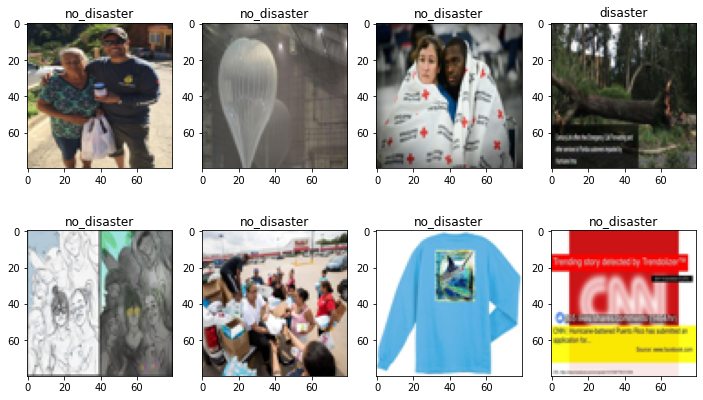

In [ ]:
plt.figure(figsize = (12,7))
datas = ['no_disaster', 'disaster']
for i in range(8):
    ind = random.randint(0, len(hurricane_img))
    plt.subplot(240 + 1 + i)
    plt.imshow(hurricane_img[ind])
    plt.title(datas[hurricane_out[ind]])

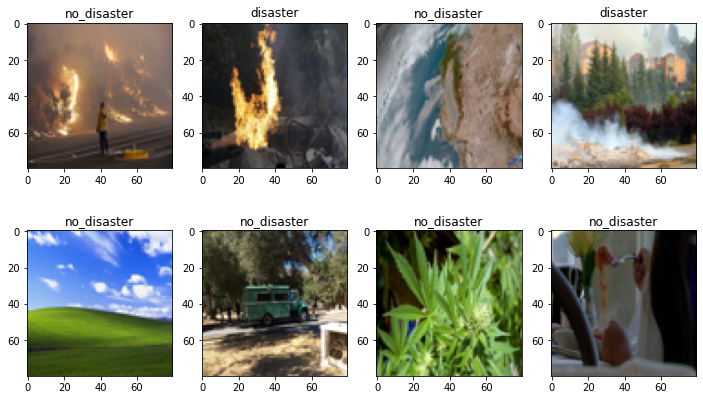

In [ ]:
plt.figure(figsize = (12,7))
datas = ['no_disaster', 'disaster']
for i in range(8):
    ind = random.randint(0, len(wildfire_img))
    plt.subplot(240 + 1 + i)
    plt.imshow(wildfire_img[ind])
    plt.title(datas[wildfire_out[ind]])

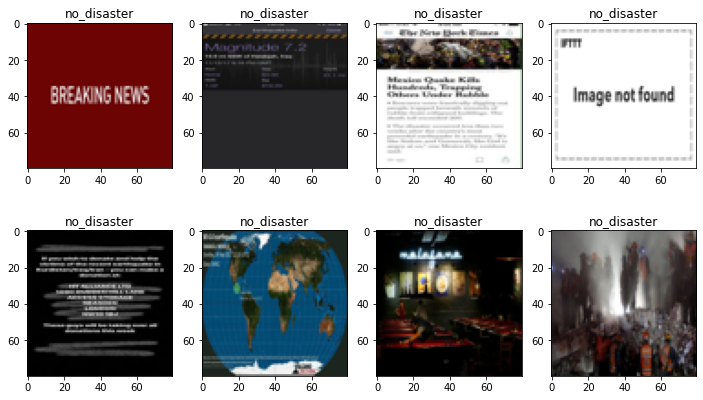

In [ ]:
plt.figure(figsize = (12,7))
datas = ['no_disaster', 'disaster']
for i in range(8):
    ind = random.randint(0, len(earthquake_img))
    plt.subplot(240 + 1 + i)
    plt.imshow(earthquake_img[ind])
    plt.title(datas[earthquake_out[ind]])

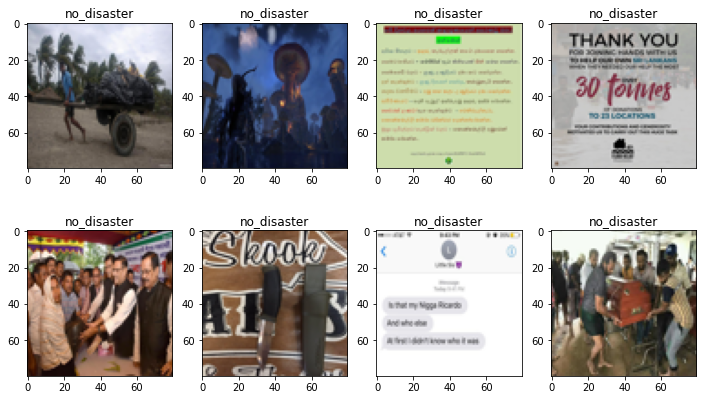

In [ ]:
plt.figure(figsize = (12,7))
datas = ['no_disaster', 'disaster']
for i in range(8):
    ind = random.randint(0, len(flood_img))
    plt.subplot(240 + 1 + i)
    plt.imshow(flood_img[ind])
    plt.title(datas[flood_out[ind]])

In [15]:
train_hurricane, test_hurricane, train_hurricane_y, test_hurricane_y=divide_data(hurricane_img, hurricane_out, 99)

train_wildfire, test_wildfire, train_wildfire_y, test_wildfire_y=divide_data(wildfire_img, wildfire_out, 95)

train_earthquake, test_earthquake, train_earthquake_y, test_earthquake_y=divide_data(earthquake_img, earthquake_out, 95)

train_flood, test_flood, train_flood_y, test_flood_y=divide_data(flood_img, flood_out, 95)


print("Train set shape: "+str(np.array(train_hurricane).shape))
print("Test set shape: "+str(np.array(test_hurricane).shape))
print("Train set output shape: "+str(np.array(train_hurricane_y).shape))
print("Test set output shape: "+str(np.array(test_hurricane_y).shape))

print("Train set shape: "+str(np.array(train_wildfire).shape))
print("Test set shape: "+str(np.array(test_wildfire).shape))
print("Train set output shape: "+str(np.array(train_wildfire_y).shape))
print("Test set output shape: "+str(np.array(test_wildfire_y).shape))

print("Train set shape: "+str(np.array(train_earthquake).shape))
print("Test set shape: "+str(np.array(test_earthquake).shape))
print("Train set output shape: "+str(np.array(train_earthquake_y).shape))
print("Test set output shape: "+str(np.array(test_earthquake_y).shape))

print("Train set shape: "+str(np.array(train_flood).shape))
print("Test set shape: "+str(np.array(test_flood).shape))
print("Train set output shape: "+str(np.array(train_flood_y).shape))
print("Test set output shape: "+str(np.array(test_flood_y).shape))

Train set shape: (13394, 80, 80, 3)
Test set shape: (136, 80, 80, 3)
Train set output shape: (1, 13394)
Test set output shape: (1, 136)
Train set shape: (1509, 80, 80, 3)
Test set shape: (80, 80, 80, 3)
Train set output shape: (1, 1509)
Test set output shape: (1, 80)
Train set shape: (1882, 80, 80, 3)
Test set shape: (100, 80, 80, 3)
Train set output shape: (1, 1882)
Test set output shape: (1, 100)
Train set shape: (973, 80, 80, 3)
Test set shape: (52, 80, 80, 3)
Train set output shape: (1, 973)
Test set output shape: (1, 52)


In [16]:
train_hurricane = np.array(train_hurricane)
test_hurricane = np.array(test_hurricane)

train_wildfire = np.array(train_wildfire)
test_wildfire = np.array(test_wildfire)

train_earthquake = np.array(train_earthquake)
test_earthquake = np.array(test_earthquake)

train_flood = np.array(train_flood)
test_flood = np.array(test_flood)

train_hurricane_flatten = train_hurricane.reshape(train_hurricane.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_hurricane_flatten = test_hurricane.reshape(test_hurricane.shape[0], -1).T

train_wildfire_flatten = train_wildfire.reshape(train_wildfire.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_wildfire_flatten = test_wildfire.reshape(test_wildfire.shape[0], -1).T

train_earthquake_flatten = train_earthquake.reshape(train_earthquake.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_earthquake_flatten = test_earthquake.reshape(test_earthquake.shape[0], -1).T

train_flood_flatten = train_flood.reshape(train_flood.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_flood_flatten = test_flood.reshape(test_flood.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_hurricane_x = train_hurricane_flatten/255.
test_hurricane_x = test_hurricane_flatten/255.

train_wildfire_x = train_wildfire_flatten/255.
test_wildfire_x = test_wildfire_flatten/255.

train_earthquake_x = train_earthquake_flatten/255.
test_earthquake_x = test_earthquake_flatten/255.

train_flood_x = train_flood_flatten/255.
test_flood_x = test_flood_flatten/255.

print ("train_hurricane_x's shape: " + str(train_hurricane_x.shape))
print ("test_hurricane_x's shape: " + str(test_hurricane_x.shape))

print ("train_wildfire_x's shape: " + str(train_wildfire_x.shape))
print ("test_wildfire_x's shape: " + str(test_wildfire_x.shape))

print ("train_earthquake_x's shape: " + str(train_earthquake_x.shape))
print ("test_earthquake_x's shape: " + str(test_earthquake_x.shape))

print ("train_flood_x's shape: " + str(train_flood_x.shape))
print ("test_flood_x's shape: " + str(test_flood_x.shape))

train_hurricane_x's shape: (19200, 13394)
test_hurricane_x's shape: (19200, 136)
train_wildfire_x's shape: (19200, 1509)
test_wildfire_x's shape: (19200, 80)
train_earthquake_x's shape: (19200, 1882)
test_earthquake_x's shape: (19200, 100)
train_flood_x's shape: (19200, 973)
test_flood_x's shape: (19200, 52)


# L_layer neural network

In [17]:
layers_dims = [19200, 45, 20, 5, 3, 1]

In [ ]:
parameters_hurricane, costs_hurricane = L_layer_model(train_hurricane_x, train_hurricane_y, layers_dims, num_iterations = 500, print_cost = True)
parameters_wildfire, costs_wildfire = L_layer_model(train_wildfire_x, train_wildfire_y, layers_dims, num_iterations = 500, print_cost = True)
parameters_earthquake, costs_earthquake = L_layer_model(train_earthquake_x, train_earthquake_y, layers_dims, num_iterations = 500, print_cost = True)
parameters_flood, costs_flood = L_layer_model(train_flood_x, train_flood_y, layers_dims, num_iterations = 500, print_cost = True)

Cost after iteration 0: 0.6931471584836578
Cost after iteration 100: 0.5723689049948907
Cost after iteration 200: 0.5351220107765997
Cost after iteration 300: 0.5222964666869885
Cost after iteration 400: 0.5175018767333152
Cost after iteration 499: 0.5156226725051549
Cost after iteration 0: 0.6931471740542179
Cost after iteration 100: 0.6722180697246124
Cost after iteration 200: 0.6661618380456474
Cost after iteration 300: 0.6643727167209172
Cost after iteration 400: 0.6638357903772332
Cost after iteration 499: 0.6636739095553977
Cost after iteration 0: 0.6931471809354325
Cost after iteration 100: 0.5615987290708697
Cost after iteration 200: 0.5207533824733321
Cost after iteration 300: 0.5064653510963749
Cost after iteration 400: 0.5010036343313055
Cost after iteration 499: 0.4988051099099829
Cost after iteration 0: 0.6931471946232229
Cost after iteration 100: 0.4589419523693803
Cost after iteration 200: 0.38168695114008905
Cost after iteration 300: 0.3507126388872922
Cost after iterat

In [ ]:
pred_train = predict(train_hurricane_x, train_hurricane_y, parameters_hurricane)
pred_train = predict(train_wildfire_x, train_wildfire_y, parameters_wildfire)
pred_train = predict(train_earthquake_x, train_earthquake_y, parameters_earthquake)
pred_train = predict(train_flood_x, train_flood_y, parameters_flood)

Accuracy: 0.7897566074361655
Accuracy: 0.6209410205434062
Accuracy: 0.8023379383634428
Accuracy: 0.9023638232271326


In [ ]:
pred_test = predict(test_hurricane_x, test_hurricane_y, parameters_hurricane)
pred_test = predict(test_wildfire_x, test_wildfire_y, parameters_wildfire)
pred_test = predict(test_earthquake_x, test_earthquake_y, parameters_earthquake)
pred_test = predict(test_flood_x, test_flood_y, parameters_flood)

Accuracy: 0.8014705882352942
Accuracy: 0.625
Accuracy: 0.7999999999999999
Accuracy: 0.8846153846153848


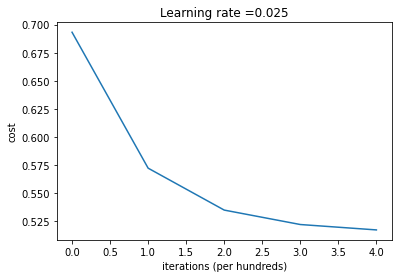

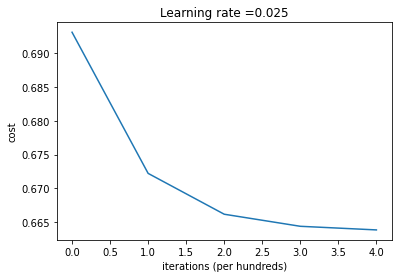

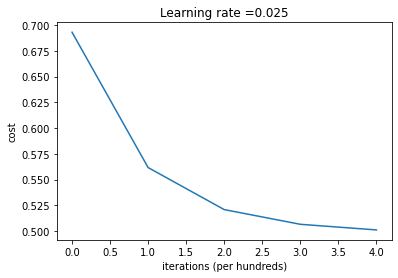

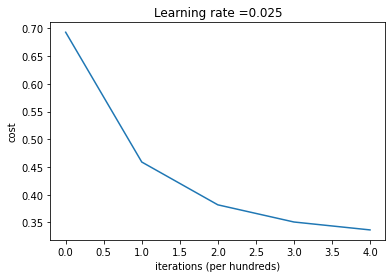

In [ ]:
plot_costs(costs_hurricane)
plot_costs(costs_wildfire)
plot_costs(costs_earthquake)
plot_costs(costs_flood)

Actual value: 1
Accuracy: 0.0
Actual value: 0
Accuracy: 1.0
Actual value: 0
Accuracy: 1.0
Actual value: 0
Accuracy: 1.0
Actual value: 0
Accuracy: 1.0
Actual value: 0
Accuracy: 1.0
Actual value: 0
Accuracy: 1.0
Actual value: 0
Accuracy: 1.0


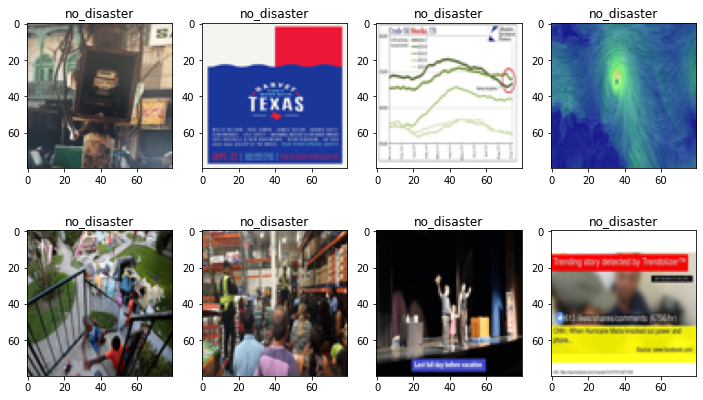

In [ ]:
plt.figure(figsize = (12,7))
datas = ['no_disaster', 'disaster']
for i in range(8):
    ind = random.randint(0, len(hurricane_img))
    image=np.array(hurricane_img[ind])
    image = image.reshape((1, 80 * 80 * 3)).T
    image= image/255.
    print("Actual value: "+str(hurricane_df.iloc[ind,0]))
    plt.subplot(240 + 1 + i)
    plt.imshow(hurricane_img[ind])
    plt.title(datas[int(predict(image, hurricane_df.iloc[ind,0], parameters_hurricane)[0][0])])

Actual value: 0
Accuracy: 1.0
Actual value: 1
Accuracy: 0.0
Actual value: 0
Accuracy: 1.0
Actual value: 1
Accuracy: 0.0
Actual value: 0
Accuracy: 1.0
Actual value: 1
Accuracy: 0.0
Actual value: 1
Accuracy: 0.0
Actual value: 1
Accuracy: 0.0


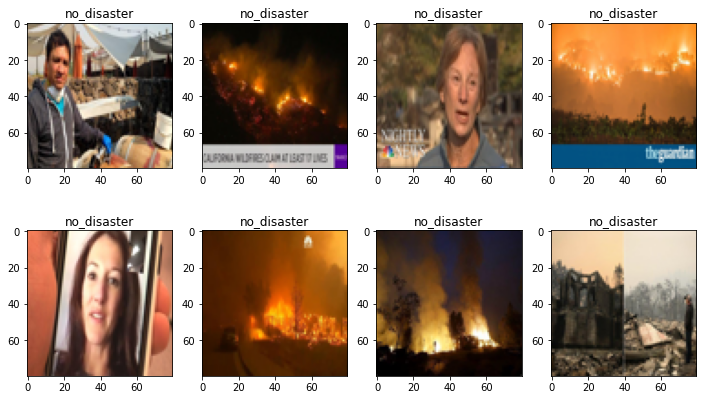

In [ ]:
plt.figure(figsize = (12,7))
datas = ['no_disaster', 'disaster']
for i in range(8):
    ind = random.randint(0, len(wildfire_img))
    image=np.array(wildfire_img[ind])
    image = image.reshape((1, 80 * 80 * 3)).T
    image= image/255.
    print("Actual value: "+str(wildfire_df.iloc[ind,0]))
    plt.subplot(240 + 1 + i)
    plt.imshow(wildfire_img[ind])
    plt.title(datas[int(predict(image, wildfire_df.iloc[ind,0], parameters_wildfire)[0][0])])

Actual value: 0
Accuracy: 1.0
Actual value: 1
Accuracy: 0.0
Actual value: 0
Accuracy: 1.0
Actual value: 0
Accuracy: 1.0
Actual value: 0
Accuracy: 1.0
Actual value: 0
Accuracy: 1.0
Actual value: 0
Accuracy: 1.0
Actual value: 0
Accuracy: 1.0


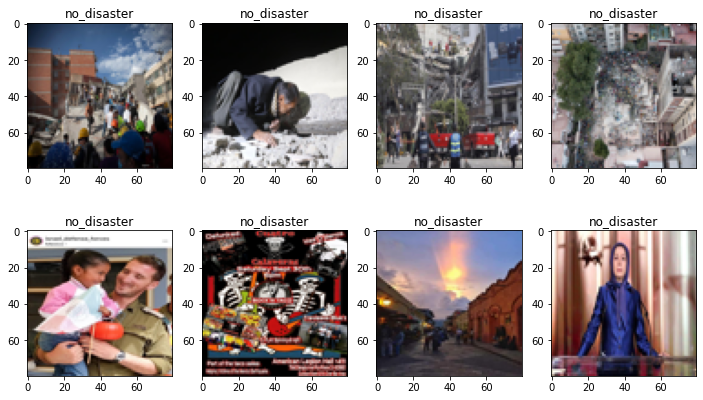

In [ ]:
plt.figure(figsize = (12,7))
datas = ['no_disaster', 'disaster']
for i in range(8):
    ind = random.randint(0, len(earthquake_img))
    image=np.array(earthquake_img[ind])
    image = image.reshape((1, 80 * 80 * 3)).T
    image= image/255.
    print("Actual value: "+str(earthquake_df.iloc[ind,0]))
    plt.subplot(240 + 1 + i)
    plt.imshow(earthquake_img[ind])
    plt.title(datas[int(predict(image, earthquake_df.iloc[ind,0], parameters_earthquake)[0][0])])

Actual value: 0
Accuracy: 1.0
Actual value: 0
Accuracy: 1.0
Actual value: 0
Accuracy: 1.0
Actual value: 0
Accuracy: 1.0
Actual value: 0
Accuracy: 1.0
Actual value: 0
Accuracy: 1.0
Actual value: 0
Accuracy: 1.0
Actual value: 0
Accuracy: 1.0


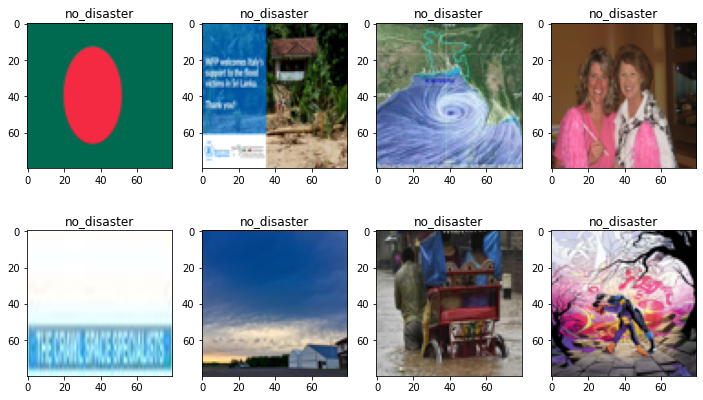

In [ ]:
plt.figure(figsize = (12,7))
datas = ['no_disaster', 'disaster']
for i in range(8):
    ind = random.randint(0, len(flood_img))
    image=np.array(flood_img[ind])
    image = image.reshape((1, 80 * 80 * 3)).T
    image= image/255.
    print("Actual value: "+str(floods_df.iloc[ind,0]))
    plt.subplot(240 + 1 + i)
    plt.imshow(flood_img[ind])
    plt.title(datas[int(predict(image, floods_df.iloc[ind,0], parameters_flood)[0][0])])

# GoogLeNet

In [18]:
from keras.layers import Concatenate, Add
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, AveragePooling2D, Flatten, GlobalAveragePooling2D, Dense, Dropout
from keras.optimizers import SGD
from keras.metrics import binary_crossentropy, categorical_crossentropy
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint

In [19]:
def get_images_googlenet(disaster_df):
    wildfire_img=[]
    earthquake_img=[]
    hurricane_img=[]
    flood_img=[]
    
    wildfire_out=[]
    earthquake_out=[]
    hurricane_out=[]
    flood_out=[]
    for index, disaster in disaster_df.iterrows():
        img_path = disaster['image_path']
        img="/content/CrisisMMD_v2.0/"+str(img_path)
        pic = cv2.imread(img)
        pic = cv2.cvtColor(pic,cv2.COLOR_BGR2RGB)
        img_array = Image.fromarray(pic, 'RGB')
        img_rs = img_array.resize((224,224))
        img_rs = np.array(img_rs)
        
        if "hurricane_irma" in img_path:
            hurricane_img.append(img_rs)
            hurricane_out.append(disaster['is_disaster'])
        elif "hurricane_maria" in img_path:
            hurricane_img.append(img_rs)
            hurricane_out.append(disaster['is_disaster'])
        elif "hurricane_harvey" in img_path:
            hurricane_img.append(img_rs)
            hurricane_out.append(disaster['is_disaster'])
        elif "california_wildfires" in img_path:
            wildfire_img.append(img_rs)
            wildfire_out.append(disaster['is_disaster'])
        elif "iraq_iran_earthquake" in img_path:
            earthquake_img.append(img_rs)
            earthquake_out.append(disaster['is_disaster'])
        elif "mexico_earthquake" in img_path:
            earthquake_img.append(img_rs)
            earthquake_out.append(disaster['is_disaster'])
        elif "srilanka_floods" in img_path:
            flood_img.append(img_rs)
            flood_out.append(disaster['is_disaster'])
    return (hurricane_img, wildfire_img, earthquake_img, flood_img, hurricane_out, wildfire_out, earthquake_out, flood_out)

In [20]:
(hurricane_img, wildfire_img, earthquake_img, flood_img, hurricane_out, wildfire_out, earthquake_out, flood_out) = get_images_googlenet(disaster_df)

In [21]:
train_hurricane, test_hurricane, train_hurricane_y, test_hurricane_y=divide_data(hurricane_img, hurricane_out, 99)

train_wildfire, test_wildfire, train_wildfire_y, test_wildfire_y=divide_data(wildfire_img, wildfire_out, 95)

train_earthquake, test_earthquake, train_earthquake_y, test_earthquake_y=divide_data(earthquake_img, earthquake_out, 95)

train_flood, test_flood, train_flood_y, test_flood_y=divide_data(flood_img, flood_out, 95)

In [ ]:
def Inception_block(input_layer, f1, f2_conv1, f2_conv3, f3_conv1, f3_conv5, f4): 
    # Input: 
    # - f1: number of filters of the 1x1 convolutional layer in the first path
    # - f2_conv1, f2_conv3 are number of filters corresponding to the 1x1 and 3x3 convolutional layers in the second path
    # - f3_conv1, f3_conv5 are the number of filters corresponding to the 1x1 and 5x5  convolutional layer in the third path
    # - f4: number of filters of the 1x1 convolutional layer in the fourth path

    # 1st path:
    path1 = Conv2D(filters=f1, kernel_size = (1,1), padding = 'same', activation = 'relu')(input_layer)

    # 2nd path
    path2 = Conv2D(filters = f2_conv1, kernel_size = (1,1), padding = 'same', activation = 'relu')(input_layer)
    path2 = Conv2D(filters = f2_conv3, kernel_size = (3,3), padding = 'same', activation = 'relu')(path2)

    # 3rd path
    path3 = Conv2D(filters = f3_conv1, kernel_size = (1,1), padding = 'same', activation = 'relu')(input_layer)
    path3 = Conv2D(filters = f3_conv5, kernel_size = (5,5), padding = 'same', activation = 'relu')(path3)

    # 4th path
    path4 = MaxPooling2D((3,3), strides= (1,1), padding = 'same')(input_layer)
    path4 = Conv2D(filters = f4, kernel_size = (1,1), padding = 'same', activation = 'relu')(path4)

    concatenation_layer = Concatenate(axis=-1)
    output_layer = concatenation_layer([path1, path2, path3, path4])

    return output_layer

In [ ]:
def GoogLeNet():
    # input layer 
    input_layer = Input(shape = (224, 224, 3))

    # convolutional layer: filters = 64, kernel_size = (7,7), strides = 2
    X = Conv2D(filters = 64, kernel_size = (7,7), strides = 2, padding = 'valid', activation = 'relu')(input_layer)

    # max-pooling layer: pool_size = (3,3), strides = 2
    X = MaxPooling2D(pool_size = (3,3), strides = 2)(X)

    # convolutional layer: filters = 64, strides = 1
    X = Conv2D(filters = 64, kernel_size = (1,1), strides = 1, padding = 'same', activation = 'relu')(X)

    # convolutional layer: filters = 192, kernel_size = (3,3)
    X = Conv2D(filters = 192, kernel_size = (3,3), padding = 'same', activation = 'relu')(X)

    # max-pooling layer: pool_size = (3,3), strides = 2
    X = MaxPooling2D(pool_size= (3,3), strides = 2)(X)

    # 1st Inception block
    X = Inception_block(X, f1 = 64, f2_conv1 = 96, f2_conv3 = 128, f3_conv1 = 16, f3_conv5 = 32, f4 = 32)

    # 2nd Inception block
    X = Inception_block(X, f1 = 128, f2_conv1 = 128, f2_conv3 = 192, f3_conv1 = 32, f3_conv5 = 96, f4 = 64)

    # max-pooling layer: pool_size = (3,3), strides = 2
    X = MaxPooling2D(pool_size= (3,3), strides = 2)(X)

    # 3rd Inception block
    X = Inception_block(X, f1 = 192, f2_conv1 = 96, f2_conv3 = 208, f3_conv1 = 16, f3_conv5 = 48, f4 = 64)

    # Extra network 1:
    X1 = AveragePooling2D(pool_size = (5,5), strides = 3)(X)
    X1 = Conv2D(filters = 128, kernel_size = (1,1), padding = 'same', activation = 'relu')(X1)
    X1 = Flatten()(X1)
    X1 = Dense(1024, activation = 'relu')(X1)
    X1 = Dropout(0.7)(X1)
    X1 = Dense(2, activation = 'softmax')(X1)


    # 4th Inception block
    X = Inception_block(X, f1 = 160, f2_conv1 = 112, f2_conv3 = 224, f3_conv1 = 24, f3_conv5 = 64, f4 = 64)

    # 5th Inception block
    X = Inception_block(X, f1 = 128, f2_conv1 = 128, f2_conv3 = 256, f3_conv1 = 24, f3_conv5 = 64, f4 = 64)

    # 6th Inception block
    X = Inception_block(X, f1 = 112, f2_conv1 = 144, f2_conv3 = 288, f3_conv1 = 32, f3_conv5 = 64, f4 = 64)

    # Extra network 2:
    X2 = AveragePooling2D(pool_size = (5,5), strides = 3)(X)
    X2 = Conv2D(filters = 128, kernel_size = (1,1), padding = 'same', activation = 'relu')(X2)
    X2 = Flatten()(X2)
    X2 = Dense(1024, activation = 'relu')(X2)
    X2 = Dropout(0.7)(X2)
    X2 = Dense(2, activation = 'softmax')(X2)


    # 7th Inception block
    X = Inception_block(X, f1 = 256, f2_conv1 = 160, f2_conv3 = 320, f3_conv1 = 32, 
                      f3_conv5 = 128, f4 = 128)

    # max-pooling layer: pool_size = (3,3), strides = 2
    X = MaxPooling2D(pool_size = (3,3), strides = 2)(X)

    # 8th Inception block
    X = Inception_block(X, f1 = 256, f2_conv1 = 160, f2_conv3 = 320, f3_conv1 = 32, f3_conv5 = 128, f4 = 128)

    # 9th Inception block
    X = Inception_block(X, f1 = 384, f2_conv1 = 192, f2_conv3 = 384, f3_conv1 = 48, f3_conv5 = 128, f4 = 128)

    # Global Average pooling layer 
    X = GlobalAveragePooling2D(name = 'GAPL')(X)

    # Dropoutlayer 
    X = Dropout(0.4)(X)

    # output layer 
    X = Dense(2, activation = 'softmax')(X)

    # model
    model = Model(input_layer, [X, X1, X2], name = 'GoogLeNet')
    opt = SGD(lr = 0.1)
    model.compile(loss = binary_crossentropy, optimizer = opt, metrics = ['accuracy'])

    return model

In [22]:
def preprocess_data(X, y):
    # convert X from list to array
    X = np.array(X)

    # convert integer values of X into floats
    X = X.astype(np.float32)

    # normalization 
    X = X/255.0

    # one-hot encoding the labels 
    y = to_categorical(np.array(y))
    return X, y

In [23]:
train_hurricane_y = train_hurricane_y.flatten()
test_hurricane_y = test_hurricane_y.flatten()

train_wildfire_y = train_wildfire_y.flatten()
test_wildfire_y = test_wildfire_y.flatten()

train_earthquake_y = train_earthquake_y.flatten()
test_earthquake_y = test_earthquake_y.flatten()

train_flood_y = train_flood_y.flatten()
test_flood_y = test_flood_y.flatten()

(train_hurricane_X, train_hurricane_Y) = preprocess_data(train_hurricane, train_hurricane_y)
(test_hurricane_X, test_hurricane_Y) = preprocess_data(test_hurricane, test_hurricane_y)

(train_wildfire_X, train_wildfire_Y) = preprocess_data(train_wildfire, train_wildfire_y)
(test_wildfire_X, test_wildfire_Y) = preprocess_data(test_wildfire, test_wildfire_y)

(train_earthquake_X, train_earthquake_Y) = preprocess_data(train_earthquake, train_earthquake_y)
(test_earthquake_X, test_earthquake_Y) = preprocess_data(test_earthquake, test_earthquake_y)

(train_flood_X, train_flood_Y) = preprocess_data(train_flood, train_flood_y)
(test_flood_X, test_flood_Y) = preprocess_data(test_flood, test_flood_y)


In [ ]:
def train_model(model, X_train, y_train, X_test, y_test, epochs, batch_size):
  # Data generator
  #datagen = ImageDataGenerator(rotation_range = 5, width_shift_range = 0.1, 
  #                             height_shift_range = 0.1, horizontal_flip = True)
  # iteration on the training set
  #it_train = datagen.flow(X_train, y_train, batch_size = batch_size)
  # path to save the checkpoint 
  #path_cp = os.getcwd() + '/' + 'weights_.hdf5'
  #checkpoint_ = ModelCheckpoint(path_cp, monitor = 'loss', save_best_only = True, 
  #                              mode = 'auto')
  steps = X_train.shape[0]//batch_size
  # Fitting the model
  history = model.fit(X_train, y_train, batch_size = batch_size, epochs = epochs, steps_per_epoch = steps, 
                                validation_data = (X_test, y_test), verbose = 1)
  
  
  
  return history

def get_accuracy(model, X_test, y_test):
    # Evaluating the model
    loss, acc, *remaining = model.evaluate(X_test, y_test, verbose = 1)
    print('%.3f' % (acc * 100.0))
    return (loss, acc)

In [ ]:
GoogLeNet_model_hurricane = GoogLeNet()
GoogLeNet_model_wildfire = GoogLeNet()
GoogLeNet_model_earthquake= GoogLeNet()
GoogLeNet_model_flood = GoogLeNet()
GoogLeNet_model_hurricane.summary()

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Model: "GoogLeNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 109, 109, 64  9472        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 54, 54, 64)   0           ['conv2d[0][0]']                 
                                                                                          

In [ ]:
GoogLeNet_model_flood.summary()

Model: "GoogLeNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_177 (Conv2D)            (None, 109, 109, 64  9472        ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d_39 (MaxPooling2D  (None, 54, 54, 64)  0           ['conv2d_177[0][0]']             
 )                                                                                        

In [ ]:
train_history_hurricane = train_model(GoogLeNet_model_hurricane, train_hurricane_X, train_hurricane_Y, test_hurricane_X, test_hurricane_Y, epochs = 50, batch_size = 128)

Epoch 1/50
104/104 [==============================] - 26s 97ms/step - loss: 1.5843 - dense_4_loss: 0.5281 - dense_1_loss: 0.5258 - dense_3_loss: 0.5304 - dense_4_accuracy: 0.7894 - dense_1_accuracy: 0.7872 - dense_3_accuracy: 0.7878 - val_loss: 1.4815 - val_dense_4_loss: 0.4926 - val_dense_1_loss: 0.4939 - val_dense_3_loss: 0.4950 - val_dense_4_accuracy: 0.7941 - val_dense_1_accuracy: 0.7941 - val_dense_3_accuracy: 0.7941
Epoch 2/50
104/104 [==============================] - 10s 86ms/step - loss: 1.4696 - dense_4_loss: 0.4892 - dense_1_loss: 0.4882 - dense_3_loss: 0.4921 - dense_4_accuracy: 0.7897 - dense_1_accuracy: 0.7897 - dense_3_accuracy: 0.7897 - val_loss: 1.4140 - val_dense_4_loss: 0.4748 - val_dense_1_loss: 0.4694 - val_dense_3_loss: 0.4699 - val_dense_4_accuracy: 0.7941 - val_dense_1_accuracy: 0.7941 - val_dense_3_accuracy: 0.7941
Epoch 3/50
104/104 [==============================] - 9s 85ms/step - loss: 1.4308 - dense_4_loss: 0.4773 - dense_1_loss: 0.4753 - dense_3_loss: 0.47

In [ ]:
train_history_wildfire = train_model(GoogLeNet_model_wildfire, train_wildfire_X, train_wildfire_Y, test_wildfire_X, test_wildfire_Y, epochs = 130, batch_size = 128)

Epoch 1/130
11/11 [==============================] - 6s 217ms/step - loss: 2.0484 - dense_9_loss: 0.6845 - dense_6_loss: 0.6809 - dense_8_loss: 0.6830 - dense_9_accuracy: 0.6030 - dense_6_accuracy: 0.6165 - dense_8_accuracy: 0.6129 - val_loss: 2.0648 - val_dense_9_loss: 0.6897 - val_dense_6_loss: 0.6862 - val_dense_8_loss: 0.6889 - val_dense_9_accuracy: 0.5375 - val_dense_6_accuracy: 0.5375 - val_dense_8_accuracy: 0.5375
Epoch 2/130
11/11 [==============================] - 2s 91ms/step - loss: 1.9965 - dense_9_loss: 0.6712 - dense_6_loss: 0.6589 - dense_8_loss: 0.6664 - dense_9_accuracy: 0.6235 - dense_6_accuracy: 0.6235 - dense_8_accuracy: 0.6235 - val_loss: 2.0698 - val_dense_9_loss: 0.6900 - val_dense_6_loss: 0.6887 - val_dense_8_loss: 0.6910 - val_dense_9_accuracy: 0.5375 - val_dense_6_accuracy: 0.5375 - val_dense_8_accuracy: 0.5375
Epoch 3/130
11/11 [==============================] - 1s 93ms/step - loss: 1.9670 - dense_9_loss: 0.6602 - dense_6_loss: 0.6502 - dense_8_loss: 0.6566 -

In [ ]:
train_history_earthquake = train_model(GoogLeNet_model_earthquake, train_earthquake_X, train_earthquake_Y, test_earthquake_X, test_earthquake_Y, epochs = 100, batch_size = 128)

Epoch 1/100
14/14 [==============================] - 6s 189ms/step - loss: 1.7779 - dense_14_loss: 0.6127 - dense_11_loss: 0.5683 - dense_13_loss: 0.5970 - dense_14_accuracy: 0.7606 - dense_11_accuracy: 0.7879 - dense_13_accuracy: 0.7801 - val_loss: 1.4379 - val_dense_14_loss: 0.4835 - val_dense_11_loss: 0.4785 - val_dense_13_loss: 0.4759 - val_dense_14_accuracy: 0.8200 - val_dense_11_accuracy: 0.8200 - val_dense_13_accuracy: 0.8200
Epoch 2/100
14/14 [==============================] - 2s 90ms/step - loss: 1.5290 - dense_14_loss: 0.5050 - dense_11_loss: 0.5111 - dense_13_loss: 0.5130 - dense_14_accuracy: 0.8067 - dense_11_accuracy: 0.8067 - dense_13_accuracy: 0.8067 - val_loss: 1.4663 - val_dense_14_loss: 0.4890 - val_dense_11_loss: 0.4782 - val_dense_13_loss: 0.4991 - val_dense_14_accuracy: 0.8200 - val_dense_11_accuracy: 0.8200 - val_dense_13_accuracy: 0.8200
Epoch 3/100
14/14 [==============================] - 1s 88ms/step - loss: 1.5876 - dense_14_loss: 0.5276 - dense_11_loss: 0.529

In [ ]:
train_history_flood = train_model(GoogLeNet_model_flood, train_flood_X, train_flood_Y, test_flood_X, test_flood_Y, epochs = 80, batch_size = 128)

Epoch 1/80
7/7 [==============================] - 1s 103ms/step - loss: 0.8802 - dense_19_loss: 0.2955 - dense_16_loss: 0.2899 - dense_18_loss: 0.2947 - dense_19_accuracy: 0.9018 - dense_16_accuracy: 0.9018 - dense_18_accuracy: 0.9018 - val_loss: 0.8482 - val_dense_19_loss: 0.2827 - val_dense_16_loss: 0.2811 - val_dense_18_loss: 0.2843 - val_dense_19_accuracy: 0.9038 - val_dense_16_accuracy: 0.9038 - val_dense_18_accuracy: 0.9038
Epoch 2/80
7/7 [==============================] - 1s 95ms/step - loss: 0.8539 - dense_19_loss: 0.2867 - dense_16_loss: 0.2819 - dense_18_loss: 0.2854 - dense_19_accuracy: 0.9041 - dense_16_accuracy: 0.9041 - dense_18_accuracy: 0.9041 - val_loss: 0.9047 - val_dense_19_loss: 0.3034 - val_dense_16_loss: 0.2974 - val_dense_18_loss: 0.3038 - val_dense_19_accuracy: 0.9038 - val_dense_16_accuracy: 0.9038 - val_dense_18_accuracy: 0.9038
Epoch 3/80
7/7 [==============================] - 1s 89ms/step - loss: 0.9022 - dense_19_loss: 0.3036 - dense_16_loss: 0.2978 - dense

In [ ]:
print(GoogLeNet_model.metrics_names)

['loss', 'dense_4_loss', 'dense_1_loss', 'dense_3_loss', 'dense_4_accuracy', 'dense_1_accuracy', 'dense_3_accuracy']
KerasTensor(type_spec=TensorSpec(shape=(None, 2), dtype=tf.float32, name=None), name='dense_1/Softmax:0', description="created by layer 'dense_1'")


In [ ]:
GoogLeNet_model_test_hurricane = Model(GoogLeNet_model_hurricane.input, GoogLeNet_model_hurricane.layers[-3].output, name = 'GoogLeNet_model_test_hurricane')
GoogLeNet_model_test_wildfire = Model(GoogLeNet_model_wildfire.input, GoogLeNet_model_wildfire.layers[-3].output, name = 'GoogLeNet_model_test_wildfire')
GoogLeNet_model_test_earthquake = Model(GoogLeNet_model_earthquake.input, GoogLeNet_model_earthquake.layers[-3].output, name = 'GoogLeNet_model_test_earthquake')
GoogLeNet_model_test_flood = Model(GoogLeNet_model_flood.input, GoogLeNet_model_flood.layers[-3].output, name = 'GoogLeNet_model_test_flood')

opt = SGD(learning_rate = 0.1)
GoogLeNet_model_test_hurricane.compile(loss = binary_crossentropy, optimizer = opt, metrics = ['accuracy'])
GoogLeNet_model_test_wildfire.compile(loss = binary_crossentropy, optimizer = opt, metrics = ['accuracy'])
GoogLeNet_model_test_earthquake.compile(loss = binary_crossentropy, optimizer = opt, metrics = ['accuracy'])
GoogLeNet_model_test_flood.compile(loss = binary_crossentropy, optimizer = opt, metrics = ['accuracy'])

GoogLeNet_model_test_hurricane.summary()

Model: "GoogLeNet_model_test_hurricane"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 109, 109, 64  9472        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 54, 54, 64)   0           ['conv2d[0][0]']                 
                                                                     

In [ ]:
print(GoogLeNet_model_test.metrics_names)

[]


In [ ]:
(loss_hurricane_train, acc_hurricane_train) = get_accuracy(GoogLeNet_model_test_hurricane, train_hurricane_X, train_hurricane_Y)
(loss_wildfire_train, acc_wildfire_train) = get_accuracy(GoogLeNet_model_test_wildfire, train_wildfire_X, train_wildfire_Y)
(loss_earthquake_train, acc_earthquake_train) = get_accuracy(GoogLeNet_model_test_earthquake, train_earthquake_X, train_earthquake_Y)
(loss_flood_train, acc_flood_train) = get_accuracy(GoogLeNet_model_test_flood, train_flood_X, train_flood_Y)

419/419 [==============================] - 7s 15ms/step - loss: 0.3022 - accuracy: 0.8594
85.941
48/48 [==============================] - 2s 14ms/step - loss: 0.4537 - accuracy: 0.7860
78.595
59/59 [==============================] - 2s 15ms/step - loss: 0.3994 - accuracy: 0.8172
81.722
31/31 [==============================] - 1s 15ms/step - loss: 0.2579 - accuracy: 0.9013
90.134


In [ ]:
(loss_hurricane_test, acc_hurricane_test) = get_accuracy(GoogLeNet_model_test_hurricane, test_hurricane_X, test_hurricane_Y)
(loss_wildfire_test, acc_wildfire_test) = get_accuracy(GoogLeNet_model_test_wildfire, test_wildfire_X, test_wildfire_Y)
(loss_earthquake_test, acc_earthquake_test) = get_accuracy(GoogLeNet_model_test_earthquake, test_earthquake_X, test_earthquake_Y)
(loss_flood_test, acc_flood_test) = get_accuracy(GoogLeNet_model_test_flood, test_flood_X, test_flood_Y)

5/5 [==============================] - 0s 14ms/step - loss: 0.2944 - accuracy: 0.8603
86.029
3/3 [==============================] - 0s 14ms/step - loss: 0.5320 - accuracy: 0.7875
78.750
4/4 [==============================] - 0s 13ms/step - loss: 0.3831 - accuracy: 0.8300
83.000
2/2 [==============================] - 0s 14ms/step - loss: 0.2769 - accuracy: 0.9038
90.385


In [ ]:
loss_hurricane_test

0.2944158613681793

In [ ]:
model_json_hurricane = GoogLeNet_model_test_hurricane.to_json()
with open("model_hurricane.json", "w") as json_file:
    json_file.write(model_json_hurricane)
# serialize weights to HDF5
GoogLeNet_model_test_hurricane.save_weights("model_hurricane.h5")
print("Saved model to disk")

model_json_wildfire = GoogLeNet_model_test_wildfire.to_json()
with open("model_wildfire.json", "w") as json_file:
    json_file.write(model_json_wildfire)
# serialize weights to HDF5
GoogLeNet_model_test_wildfire.save_weights("model_wildfire.h5")
print("Saved model to disk")

model_json_earthquake = GoogLeNet_model_test_earthquake.to_json()
with open("model_earthquake.json", "w") as json_file:
    json_file.write(model_json_earthquake)
# serialize weights to HDF5
GoogLeNet_model_test_earthquake.save_weights("model_earthquake.h5")
print("Saved model to disk")

model_json_flood = GoogLeNet_model_test_flood.to_json()
with open("model_flood.json", "w") as json_file:
    json_file.write(model_json_flood)
# serialize weights to HDF5
GoogLeNet_model_test_flood.save_weights("model_flood.h5")
print("Saved model to disk")

Saved model to disk
Saved model to disk
Saved model to disk
Saved model to disk


In [ ]:
from keras.models import model_from_json

json_file_hurricane = open('model_hurricane.json', 'r')
loaded_model_json_hurricane = json_file_hurricane.read()
json_file_hurricane.close()
loaded_model_hurricane = model_from_json(loaded_model_json_hurricane)
# load weights into new model
loaded_model_hurricane.load_weights("model_hurricane.h5")
print("Loaded model from disk")

json_file_wildfire = open('model_wildfire.json', 'r')
loaded_model_json_wildfire = json_file_wildfire.read()
json_file_wildfire.close()
loaded_model_wildfire = model_from_json(loaded_model_json_wildfire)
# load weights into new model
loaded_model_wildfire.load_weights("model_wildfire.h5")
print("Loaded model from disk")

json_file_earthquake = open('model_earthquake.json', 'r')
loaded_model_json_earthquake = json_file_earthquake.read()
json_file_earthquake.close()
loaded_model_earthquake = model_from_json(loaded_model_json_earthquake)
# load weights into new model
loaded_model_earthquake.load_weights("model_earthquake.h5")
print("Loaded model from disk")

json_file_flood = open('model_flood.json', 'r')
loaded_model_json_flood = json_file_flood.read()
json_file_flood.close()
loaded_model_flood = model_from_json(loaded_model_json_flood)
# load weights into new model
loaded_model_flood.load_weights("model_flood.h5")
print("Loaded model from disk")

opt = SGD(lr = 0.1)
loaded_model_hurricane.compile(loss = binary_crossentropy, optimizer = opt, metrics = ['accuracy'])
loaded_model_wildfire.compile(loss = binary_crossentropy, optimizer = opt, metrics = ['accuracy'])
loaded_model_earthquake.compile(loss = binary_crossentropy, optimizer = opt, metrics = ['accuracy'])
loaded_model_flood.compile(loss = binary_crossentropy, optimizer = opt, metrics = ['accuracy'])

Loaded model from disk
Loaded model from disk
Loaded model from disk
Loaded model from disk


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
get_accuracy(loaded_model_hurricane, test_hurricane_X, test_hurricane_Y)
get_accuracy(loaded_model_wildfire, test_wildfire_X, test_wildfire_Y)
get_accuracy(loaded_model_earthquake, test_earthquake_X, test_earthquake_Y)
get_accuracy(loaded_model_flood, test_flood_X, test_flood_Y)

5/5 [==============================] - 9s 195ms/step - loss: 0.3342 - accuracy: 0.8676
86.765
3/3 [==============================] - 2s 396ms/step - loss: 0.5109 - accuracy: 0.7875
78.750
4/4 [==============================] - 2s 234ms/step - loss: 0.3664 - accuracy: 0.8500
85.000
2/2 [==============================] - 2s 830ms/step - loss: 0.3507 - accuracy: 0.8846
88.462


(0.3506816327571869, 0.8846153616905212)

In [ ]:
y_test_pred_hurricane = []
for i in np.arange(len(test_hurricane_X)):
  img = test_hurricane_X[i]
  img = img.reshape(1, 224, 224, 3)
  y_p = loaded_model_hurricane.predict(img)
  y_test_pred_hurricane.append(y_p)

y_test_pred_hurricane = np.asarray(y_test_pred_hurricane)

y_test_pred_wildfire = []
for i in np.arange(len(test_wildfire_X)):
  img = test_wildfire_X[i]
  img = img.reshape(1, 224, 224, 3)
  y_p = loaded_model_wildfire.predict(img)
  y_test_pred_wildfire.append(y_p)

y_test_pred_wildfire = np.asarray(y_test_pred_wildfire)

y_test_pred_earthquake = []
for i in np.arange(len(test_earthquake_X)):
  img = test_earthquake_X[i]
  img = img.reshape(1, 224, 224, 3)
  y_p = loaded_model_earthquake.predict(img)
  y_test_pred_earthquake.append(y_p)

y_test_pred_earthquake = np.asarray(y_test_pred_earthquake)

y_test_pred_flood = []
for i in np.arange(len(test_flood_X)):
  img = test_flood_X[i]
  img = img.reshape(1, 224, 224, 3)
  y_p = loaded_model_flood.predict(img)
  y_test_pred_flood.append(y_p)

y_test_pred_flood = np.asarray(y_test_pred_flood)

1/1 [==============================] - 0s 21ms/step


Text(69.0, 0.5, 'True classes')

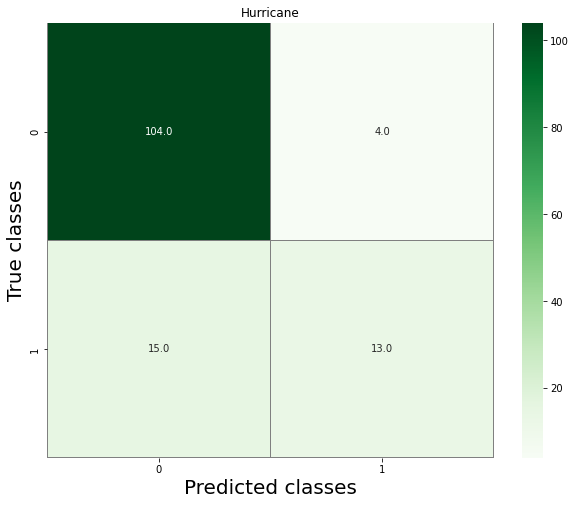

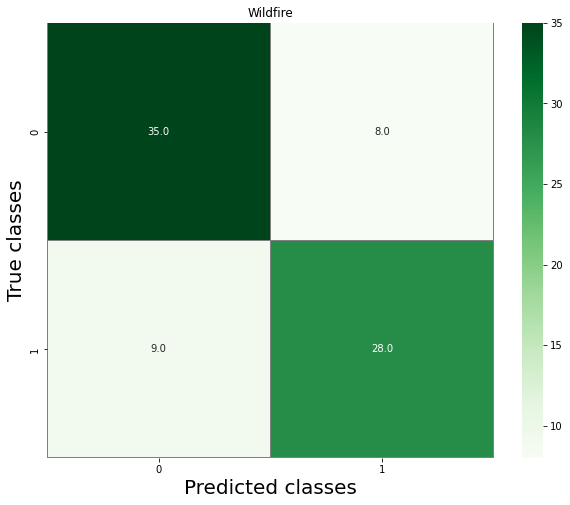

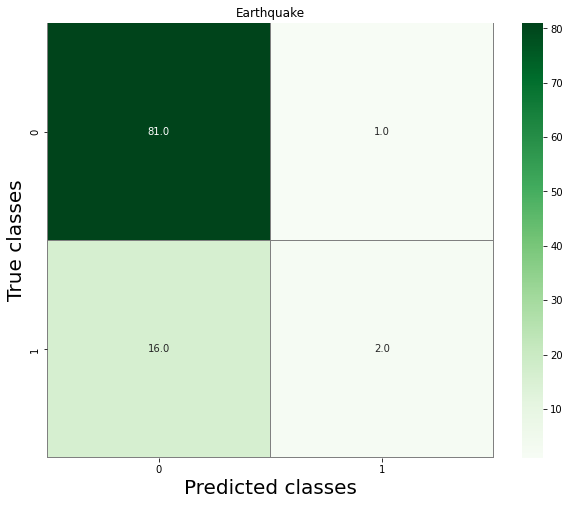

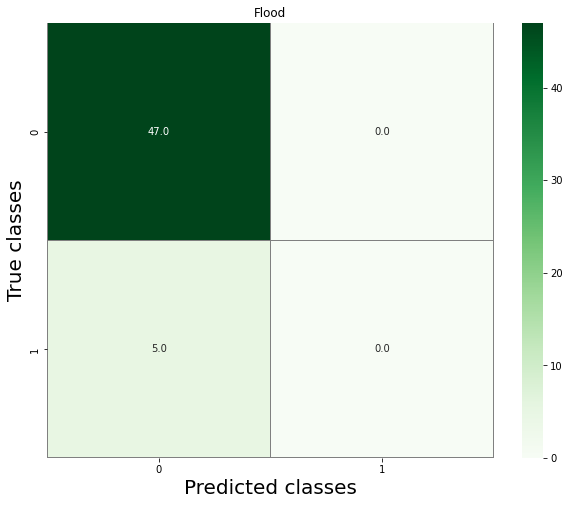

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns 

# Reverse the true and the predicted labels into the original binary 
# labels (0 and 1) to compute the confusion matrix
y_test_labels_hurricane = [np.argmax(vect) for vect in test_hurricane_Y]
y_test_pred_labels_hurricane = [np.argmax(vect) for vect in y_test_pred_hurricane]

conf_mat = confusion_matrix(y_test_labels_hurricane, y_test_pred_labels_hurricane)

plt.figure(figsize = (10,8))
sns.heatmap(conf_mat, linewidths = 0.1, cmap = 'Greens', linecolor = 'gray', 
            fmt = '.1f', annot = True)
plt.title('Hurricane')
plt.xlabel('Predicted classes', fontsize = 20)
plt.ylabel('True classes', fontsize = 20)



y_test_labels_wildfire = [np.argmax(vect) for vect in test_wildfire_Y]
y_test_pred_labels_wildfire = [np.argmax(vect) for vect in y_test_pred_wildfire]

conf_mat = confusion_matrix(y_test_labels_wildfire, y_test_pred_labels_wildfire)

plt.figure(figsize = (10,8))
sns.heatmap(conf_mat, linewidths = 0.1, cmap = 'Greens', linecolor = 'gray', 
            fmt = '.1f', annot = True)
plt.title('Wildfire')
plt.xlabel('Predicted classes', fontsize = 20)
plt.ylabel('True classes', fontsize = 20)



y_test_labels_earthquake = [np.argmax(vect) for vect in test_earthquake_Y]
y_test_pred_labels_earthquake = [np.argmax(vect) for vect in y_test_pred_earthquake]

conf_mat = confusion_matrix(y_test_labels_earthquake, y_test_pred_labels_earthquake)

plt.figure(figsize = (10,8))
sns.heatmap(conf_mat, linewidths = 0.1, cmap = 'Greens', linecolor = 'gray', 
            fmt = '.1f', annot = True)
plt.title('Earthquake')
plt.xlabel('Predicted classes', fontsize = 20)
plt.ylabel('True classes', fontsize = 20)



y_test_labels_flood = [np.argmax(vect) for vect in test_flood_Y]
y_test_pred_labels_flood = [np.argmax(vect) for vect in y_test_pred_flood]

conf_mat = confusion_matrix(y_test_labels_flood, y_test_pred_labels_flood)

plt.figure(figsize = (10,8))
sns.heatmap(conf_mat, linewidths = 0.1, cmap = 'Greens', linecolor = 'gray', 
            fmt = '.1f', annot = True)
plt.title('Flood')
plt.xlabel('Predicted classes', fontsize = 20)
plt.ylabel('True classes', fontsize = 20)

1/1 [==============================] - 0s 21ms/step


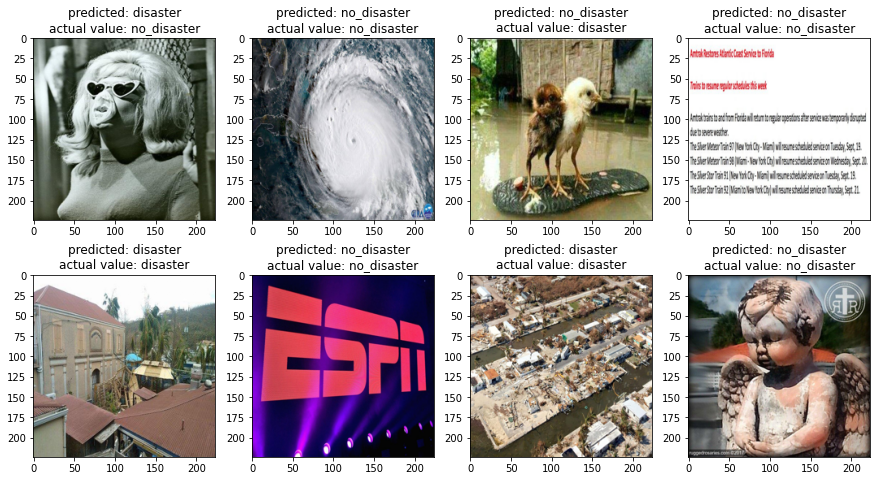

In [ ]:
datas = ['no_disaster', 'disaster']
plt.figure(figsize = (15,8))
for i in np.arange(8):
  # take randomly an indice
  ind = random.randint(0, len(test_hurricane_X))
  img = test_hurricane_X[ind]
  # reshape the image 
  img_rs = img.reshape(1,224,224,3)
  # predict the label of img
  y_pred = loaded_model_hurricane.predict(img_rs)
  # determine the corresponding category
  predicted_cate = datas[np.argmax(y_pred)]
  plt.subplot(240+1+i)
  plt.imshow(img)
  plt.title('predicted: ' + str(predicted_cate)+ '\nactual value: '+str(datas[test_hurricane_y[ind]]))

1/1 [==============================] - 0s 21ms/step


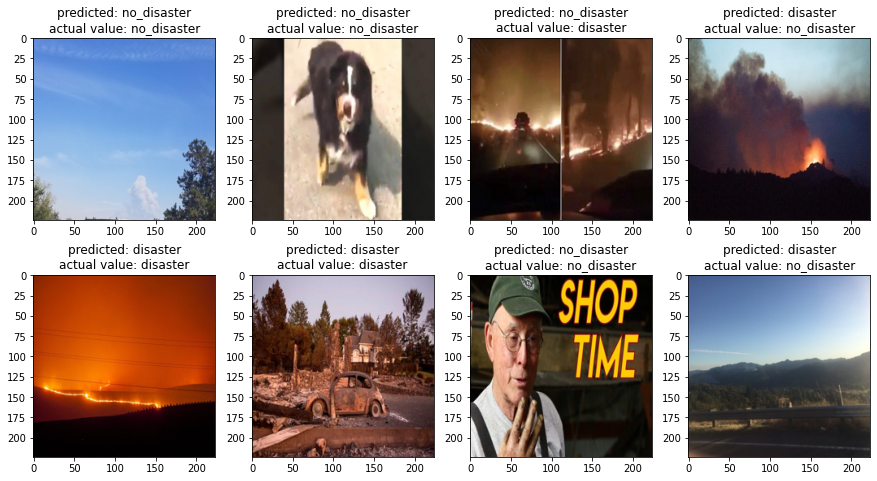

In [ ]:
datas = ['no_disaster', 'disaster']
plt.figure(figsize = (15,8))
for i in np.arange(8):
  # take randomly an indice
  ind = random.randint(0, len(test_wildfire_X))
  img = test_wildfire_X[ind]
  # reshape the image 
  img_rs = img.reshape(1,224,224,3)
  # predict the label of img
  y_pred = loaded_model_wildfire.predict(img_rs)
  # determine the corresponding category
  predicted_cate = datas[np.argmax(y_pred)]
  plt.subplot(240+1+i)
  plt.imshow(img)
  plt.title('predicted: ' + str(predicted_cate)+ '\nactual value: '+str(datas[test_wildfire_y[ind]]))

1/1 [==============================] - 0s 22ms/step


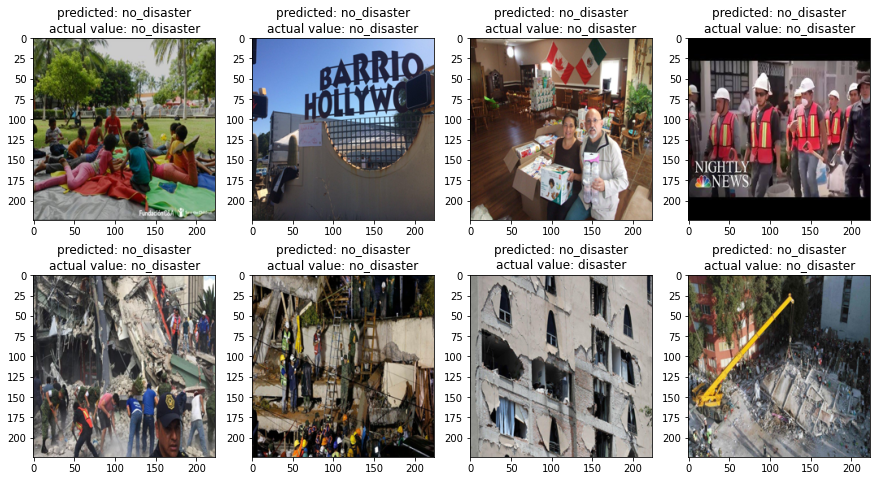

In [ ]:
datas = ['no_disaster', 'disaster']
plt.figure(figsize = (15,8))
for i in np.arange(8):
  # take randomly an indice
  ind = random.randint(0, len(test_earthquake_X))
  img = test_earthquake_X[ind]
  # reshape the image 
  img_rs = img.reshape(1,224,224,3)
  # predict the label of img
  y_pred = loaded_model_earthquake.predict(img_rs)
  # determine the corresponding category
  predicted_cate = datas[np.argmax(y_pred)]
  plt.subplot(240+1+i)
  plt.imshow(img)
  plt.title('predicted: ' + str(predicted_cate)+ '\nactual value: '+str(datas[test_earthquake_y[ind]]))

1/1 [==============================] - 0s 22ms/step


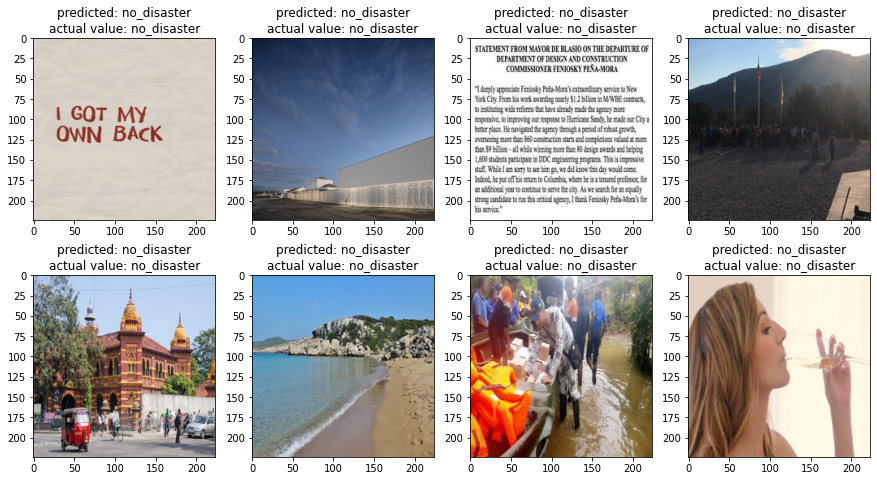

In [ ]:
datas = ['no_disaster', 'disaster']
plt.figure(figsize = (15,8))
for i in np.arange(8):
  # take randomly an indice
  ind = random.randint(0, len(test_flood_X))
  img = test_flood_X[ind]
  # reshape the image 
  img_rs = img.reshape(1,224,224,3)
  # predict the label of img
  y_pred = loaded_model_flood.predict(img_rs)
  # determine the corresponding category
  predicted_cate = datas[np.argmax(y_pred)]
  plt.subplot(240+1+i)
  plt.imshow(img)
  plt.title('predicted: ' + str(predicted_cate)+ '\nactual value: '+str(datas[test_flood_y[ind]]))

In [ ]:
damage_rated_images_hurricane_harvey=tsv_data_hurricane_harvey[tsv_data_hurricane_harvey['image_damage'].isin(options)]
hurricane_harvey_sev_df=pd.DataFrame(damage_rated_images_hurricane_harvey[disaster_df_cols],columns=disaster_df_cols)

damage_rated_images_hurricane_maria=tsv_data_hurricane_maria[tsv_data_hurricane_maria['image_damage'].isin(options)]
hurricane_maria_sev_df=pd.DataFrame(damage_rated_images_hurricane_maria[disaster_df_cols],columns=disaster_df_cols)

damage_rated_images_hurricane_irma=tsv_data_hurricane_irma[tsv_data_hurricane_irma['image_damage'].isin(options)]
hurricane_irma_sev_df=pd.DataFrame(damage_rated_images_hurricane_irma[disaster_df_cols],columns=disaster_df_cols)

frames = [hurricane_harvey_sev_df, hurricane_maria_sev_df, hurricane_irma_sev_df]
hurricane_sev_df = pd.concat(frames)

severity_list=[]

for item in hurricane_sev_df['image_damage']:
    if item == 'little_or_no_damage':
      severity_list.append(1) 
    elif item == 'mild_damage':
      severity_list.append(2)
    elif item == 'severe_damage':
      severity_list.append(3)
    
hurricane_sev_df.insert(0, "severity_rate", severity_list, False)
hurricane_sev_df

severity_rate              image_id   image_info  image_info_conf  \
4                 2  905230326359891968_2  informative           0.6864   
5                 3  906964358177214466_0  informative           1.0000   
9                 3  907612395278934016_0  informative           0.6581   
15                3  909878550068645888_0  informative           1.0000   
16                3  905200806449831937_0  informative           1.0000   
...             ...                   ...          ...              ...   
4486              1  910084787674783744_0  informative           0.3523   
4492              1  909968982362517504_0  informative           1.0000   
4503              2  910220699658342402_0  informative           1.0000   
4510              1  909820472258383872_1  informative           0.6544   
4515              2  909398796928303104_1  informative           1.0000   

                            image_human  image_human_conf  \
4     infrastructure_and_utility_damage            0.6864   
5     infrastructure_and_utility_damage            1.0000   
9     infrastructure_and_utility_damage            0.6581   
15    infrastructure_and_utility_damage            1.0000   
16    infrastructure_and_utility_damage            1.0000   
...                                 ...               ...   
4486  infrastructure_and_utility_damage            0.3523   
4492  infrastructure_and_utility_damage            1.0000   
4503  infrastructure_and_utility_damage            1.0000   
4510  infrastructure_and_utility_damage            0.6544   
4515  infrastructure_and_utility_damage            1.0000   

             image_damage  image_damage_conf  \
4             mild_damage             1.0000   
5           severe_damage             1.0000   
9           severe_damage             0.6294   
15          severe_damage             1.0000   
16          severe_damage             1.0000   
...                   ...                ...   
4486  little_or_no_damage             0.6765   
4492  little_or_no_damage             0.6563   
4503          mild_damage             0.6399   
4510  little_or_no_damage             1.0000   
4515          mild_damage             0.3395   

                                           image_url  \
4     http://pbs.twimg.com/media/DJAGLb0XgAMe0tF.jpg   
5     http://pbs.twimg.com/media/DJYvPrGUEAA7S7w.jpg   
9     http://pbs.twimg.com/media/DJh8qadVwAA_p1N.jpg   
15    http://pbs.twimg.com/media/DKCJt_tVYAAtldU.jpg   
16    http://pbs.twimg.com/media/DI_nS5wXUAAC4ij.jpg   
...                                              ...   
4486  http://pbs.twimg.com/media/DKFFSktU8AAoU_3.jpg   
4492  http://pbs.twimg.com/media/DKDb1t8UIAAe7GO.jpg   
4503  http://pbs.twimg.com/media/DKHA4XeW4AAo_Qv.jpg   
4510  http://pbs.twimg.com/media/DKBU4N2XkAA57Ld.jpg   
4515  http://pbs.twimg.com/media/DJ7VYEbUMAAMKmm.jpg   

                                             image_path  
4     data_image/hurricane_harvey/6_9_2017/905230326...  
5     data_image/hurricane_harvey/10_9_2017/90696435...  
9     data_image/hurricane_harvey/12_9_2017/90761239...  
15    data_image/hurricane_harvey/18_9_2017/90987855...  
16    data_image/hurricane_harvey/5_9_2017/905200806...  
...                                                 ...  
4486  data_image/hurricane_irma/19_9_2017/9100847876...  
4492  data_image/hurricane_irma/19_9_2017/9099689823...  
4503  data_image/hurricane_irma/19_9_2017/9102206996...  
4510  data_image/hurricane_irma/18_9_2017/9098204722...  
4515  data_image/hurricane_irma/17_9_2017/9093987969...  

[2556 rows x 10 columns]

In [ ]:
def get_sev_images(disaster_df):
    wildfire_img=[]
    earthquake_img=[]
    hurricane_img=[]
    flood_img=[]
    
    wildfire_out=[]
    earthquake_out=[]
    hurricane_out=[]
    flood_out=[]
    for index, disaster in disaster_df.iterrows():
        img_path = disaster['image_path']
        img="/content/CrisisMMD_v2.0/" + str(img_path)
        pic = cv2.imread(img)
        pic = cv2.cvtColor(pic,cv2.COLOR_BGR2RGB)
        img_array = Image.fromarray(pic, 'RGB')
        img_rs = img_array.resize((224,224))
        img_rs = np.array(img_rs)
        
        if "hurricane_irma" in img_path:
            hurricane_img.append(img_rs)
            hurricane_out.append(disaster['severity_rate'])
        elif "hurricane_maria" in img_path:
            hurricane_img.append(img_rs)
            hurricane_out.append(disaster['severity_rate'])
        elif "hurricane_harvey" in img_path:
            hurricane_img.append(img_rs)
            hurricane_out.append(disaster['severity_rate'])
        elif "california_wildfires" in img_path:
            wildfire_img.append(img_rs)
            wildfire_out.append(disaster['severity_rate'])
        elif "iraq_iran_earthquake" in img_path:
            earthquake_img.append(img_rs)
            earthquake_out.append(disaster['severity_rate'])
        elif "mexico_earthquake" in img_path:
            earthquake_img.append(img_rs)
            earthquake_out.append(disaster['severity_rate'])
        elif "srilanka_floods" in img_path:
            flood_img.append(img_rs)
            flood_out.append(disaster['severity_rate'])
    return (hurricane_img, wildfire_img, earthquake_img, flood_img, hurricane_out, wildfire_out, earthquake_out, flood_out)

In [ ]:
(hurricane_sev_img, wildfire_sev_img, earthquake_sev_img, flood_sev_img, hurricane_sev_out, wildfire_sev_out, earthquake_sev_out, flood_sev_out) = get_sev_images(hurricane_sev_df)

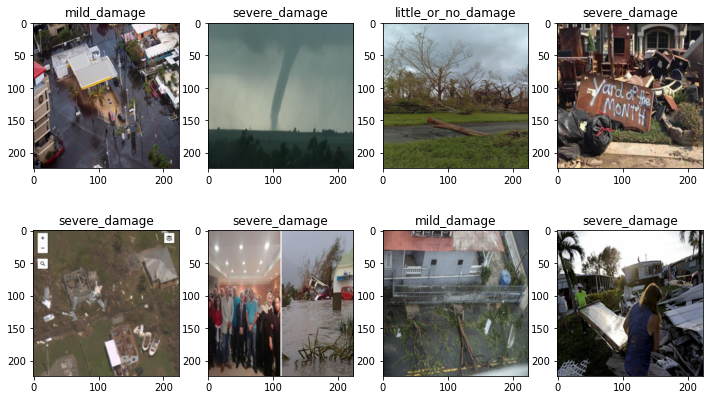

In [ ]:
plt.figure(figsize = (12,7))
for i in range(8):
    ind = random.randint(0, len(hurricane_sev_img))
    plt.subplot(240 + 1 + i)
    plt.imshow(hurricane_sev_img[ind])
    plt.title(options[hurricane_sev_out[ind]-1])

In [ ]:
train_sev_hurricane, test_sev_hurricane, train_sev_hurricane_y, test_sev_hurricane_y=divide_data(hurricane_sev_img, hurricane_sev_out, 97)

In [ ]:
print("Train set shape: "+str(np.array(train_sev_hurricane).shape))
print("Test set shape: "+str(np.array(test_sev_hurricane).shape))
print("Train set output shape: "+str(np.array(train_sev_hurricane_y).shape))
print("Test set output shape: "+str(np.array(test_sev_hurricane_y).shape))

Train set shape: (2479, 224, 224, 3)
Test set shape: (77, 224, 224, 3)
Train set output shape: (1, 2479)
Test set output shape: (1, 77)


In [ ]:
train_sev_hurricane_y = train_sev_hurricane_y.flatten()
test_sev_hurricane_y = test_sev_hurricane_y.flatten()

(train_sev_hurricane_X, train_sev_hurricane_Y) = preprocess_data(train_sev_hurricane, train_sev_hurricane_y)
(test_sev_hurricane_X, test_sev_hurricane_Y) = preprocess_data(test_sev_hurricane, test_sev_hurricane_y)

In [ ]:
from keras.backend import softmax
def GoogLeNet_sev():
    # input layer 
    input_layer = Input(shape = (224, 224, 3))

    # convolutional layer: filters = 64, kernel_size = (7,7), strides = 2
    X = Conv2D(filters = 64, kernel_size = (7,7), strides = 2, padding = 'valid', activation = 'relu')(input_layer)

    # max-pooling layer: pool_size = (3,3), strides = 2
    X = MaxPooling2D(pool_size = (3,3), strides = 2)(X)

    # convolutional layer: filters = 64, strides = 1
    X = Conv2D(filters = 64, kernel_size = (1,1), strides = 1, padding = 'same', activation = 'relu')(X)

    # convolutional layer: filters = 192, kernel_size = (3,3)
    X = Conv2D(filters = 192, kernel_size = (3,3), padding = 'same', activation = 'relu')(X)

    # max-pooling layer: pool_size = (3,3), strides = 2
    X = MaxPooling2D(pool_size= (3,3), strides = 2)(X)

    # 1st Inception block
    X = Inception_block(X, f1 = 64, f2_conv1 = 96, f2_conv3 = 128, f3_conv1 = 16, f3_conv5 = 32, f4 = 32)

    # 2nd Inception block
    X = Inception_block(X, f1 = 128, f2_conv1 = 128, f2_conv3 = 192, f3_conv1 = 32, f3_conv5 = 96, f4 = 64)

    # max-pooling layer: pool_size = (3,3), strides = 2
    X = MaxPooling2D(pool_size= (3,3), strides = 2)(X)

    # 3rd Inception block
    X = Inception_block(X, f1 = 192, f2_conv1 = 96, f2_conv3 = 208, f3_conv1 = 16, f3_conv5 = 48, f4 = 64)

    # Extra network 1:
    X1 = AveragePooling2D(pool_size = (5,5), strides = 3)(X)
    X1 = Conv2D(filters = 128, kernel_size = (1,1), padding = 'same', activation = 'relu')(X1)
    X1 = Flatten()(X1)
    X1 = Dense(1024, activation = 'relu')(X1)
    X1 = Dropout(0.7)(X1)
    X1 = Dense(3, activation = 'softmax')(X1)


    # 4th Inception block
    X = Inception_block(X, f1 = 160, f2_conv1 = 112, f2_conv3 = 224, f3_conv1 = 24, f3_conv5 = 64, f4 = 64)

    # 5th Inception block
    X = Inception_block(X, f1 = 128, f2_conv1 = 128, f2_conv3 = 256, f3_conv1 = 24, f3_conv5 = 64, f4 = 64)

    # 6th Inception block
    X = Inception_block(X, f1 = 112, f2_conv1 = 144, f2_conv3 = 288, f3_conv1 = 32, f3_conv5 = 64, f4 = 64)

    # Extra network 2:
    X2 = AveragePooling2D(pool_size = (5,5), strides = 3)(X)
    X2 = Conv2D(filters = 128, kernel_size = (1,1), padding = 'same', activation = 'relu')(X2)
    X2 = Flatten()(X2)
    X2 = Dense(1024, activation = 'relu')(X2)
    X2 = Dropout(0.7)(X2)
    X2 = Dense(3, activation = 'softmax')(X2)


    # 7th Inception block
    X = Inception_block(X, f1 = 256, f2_conv1 = 160, f2_conv3 = 320, f3_conv1 = 32, 
                      f3_conv5 = 128, f4 = 128)

    # max-pooling layer: pool_size = (3,3), strides = 2
    X = MaxPooling2D(pool_size = (3,3), strides = 2)(X)

    # 8th Inception block
    X = Inception_block(X, f1 = 256, f2_conv1 = 160, f2_conv3 = 320, f3_conv1 = 32, f3_conv5 = 128, f4 = 128)

    # 9th Inception block
    X = Inception_block(X, f1 = 384, f2_conv1 = 192, f2_conv3 = 384, f3_conv1 = 48, f3_conv5 = 128, f4 = 128)

    # Global Average pooling layer 
    X = GlobalAveragePooling2D(name = 'GAPL')(X)

    # Dropoutlayer 
    X = Dropout(0.4)(X)

    # output layer 
    X = Dense(3, activation = 'softmax')(X)

    # model
    model = Model(input_layer, [X, X1, X2], name = 'GoogLeNet')
    opt = SGD(learning_rate = 0.1)
    model.compile(loss = 'sparse_categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])

    return model

In [ ]:
GoogLeNet_model_hurricane_sev = GoogLeNet_sev()

In [ ]:
train_history_hurricane_sev = train_model(GoogLeNet_model_hurricane_sev, train_sev_hurricane_X, train_sev_hurricane_Y, test_sev_hurricane_X, test_sev_hurricane_Y, epochs = 60, batch_size = 128)

Epoch 1/60


InvalidArgumentError: ignored